In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('Coversyl.xlsx', sheet_name='Sheet2')
df

In [ ]:
adj = df[['Date','Sales']]
adj

,Date,Sales
0,2017-10-01,19150
1,2017-11-01,25203
2,2017-12-01,33242
3,2018-01-01,42759
4,2018-02-01,42733
5,2018-03-01,54340
6,2018-04-01,52882
7,2018-05-01,60221
8,2018-06-01,52829
9,2018-07-01,56409


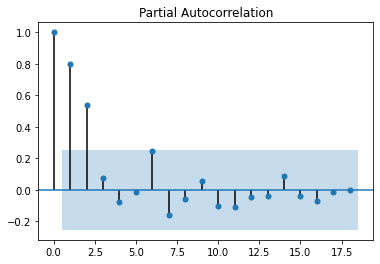

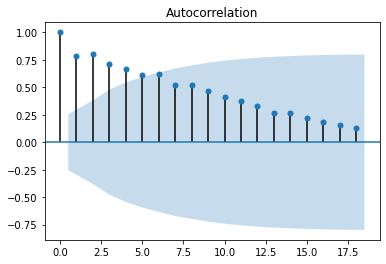

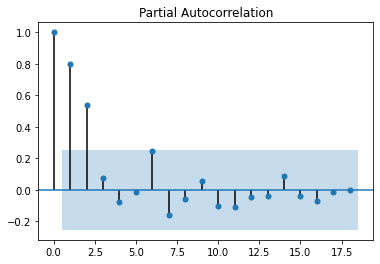

In [ ]:
plot_acf(adj['Sales'])
plot_pacf(adj['Sales'])

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(adj['Sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.347807
p-value: 0.918455


In [ ]:
adj_diff = adj['Sales'].diff().dropna()
adj_diff

1       6053.0
2       8039.0
3       9517.0
4        -26.0
5      11607.0
6      -1458.0
7       7339.0
8      -7392.0
9       3580.0
10      3686.0
11      6221.0
12      9433.0
13      6018.0
14     10025.0
15     16715.0
16     -5560.0
17      5779.0
18     11145.0
19     -8842.0
20    -20742.0
21     72965.0
22    -56869.0
23     15959.0
24       -88.0
25      1927.0
26     22116.0
27     41515.0
28    -34374.0
29    -11763.0
30     46895.0
31    -42248.0
32     -7935.0
33     22464.0
34      4077.0
35     19991.0
36    -16535.0
37     13540.0
38     40579.0
39    -14328.0
40     -1000.0
41     -7551.0
42     -3026.0
43    -12179.0
44     34791.0
45    -24946.0
46      1098.0
47     45566.0
48     21238.0
49    -16240.0
50      3416.0
51    -81275.0
52     78395.0
53     41229.0
54     16270.0
55    -20477.0
56     61440.0
57   -226510.0
58    159062.0
Name: Sales, dtype: float64

In [ ]:
result = adfuller(adj_diff.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -8.764773
p-value: 0.000000


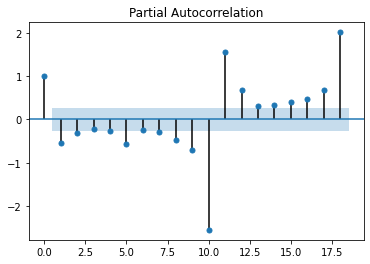

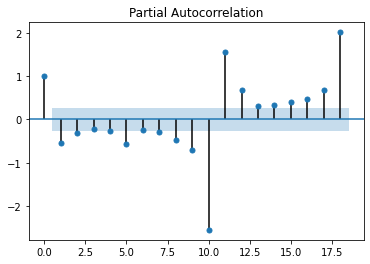

In [ ]:
plot_pacf(adj_diff.dropna())

Ma = 2 pacf

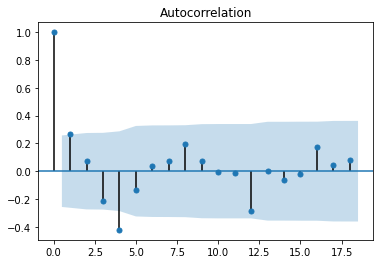

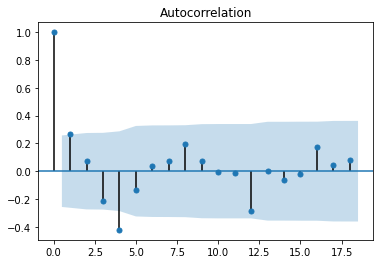

In [ ]:
plot_acf(adj_diff)

Ar = 2 acf

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 2,1,2 ARIMA Model
model = ARIMA(adj['Adj Close'], order=(3,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 1255
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -5725.146
Method:                       css-mle   S.D. of innovations             23.170
Date:                Tue, 28 Jun 2022   AIC                          11464.293
Time:                        17:31:18   BIC                          11500.237
Sample:                             1   HQIC                         11477.802
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7001      0.649      1.079      0.281      -0.571       1.971
ar.L1.D.Adj Close    -1.5703      0.090    -17.385      0.000      -1.747      -1.393
ar.L2.D.Adj Close    -0.

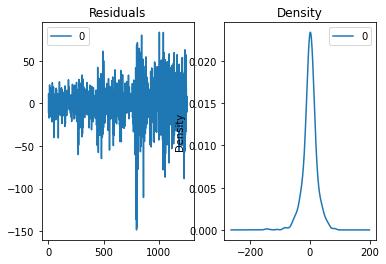

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

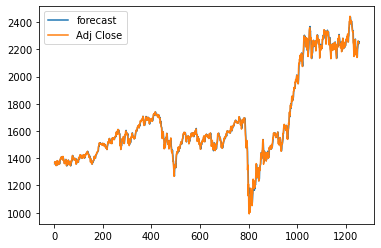

In [ ]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [ ]:
# Split train data and test data
train_size = int(len(adj['Sales'])*0.9)

train = adj['Sales'].iloc[:train_size]
test = adj['Sales'].iloc[train_size:]

In [ ]:
train.shape, test.shape

((53,), (6,))

In [ ]:
# Build Model
# model = ARIMA(train, order=(2,1,2))  
model = ARIMA(train, order=(3, 1, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(26, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

NameError: ignored

In [ ]:
!pip install pmdarima
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model = pm.auto_arima(adj['Sales'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1416.755, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1590.522, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1439.712, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1560.818, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1417.370, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1417.761, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1553.207, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1417.737, Time=0.05 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1417.305, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1431.264, Time=0.04 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.605 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   59
Model:               SARIMAX(1, 0, 1)   Log Likelihood        

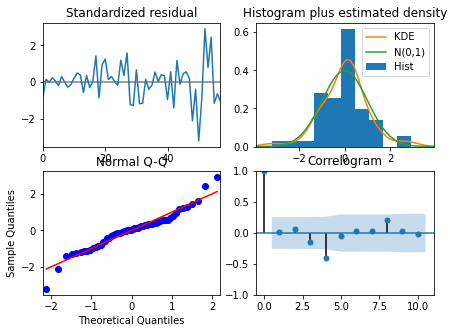

In [ ]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

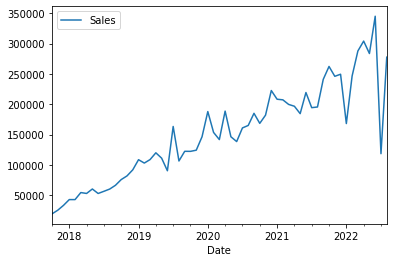

In [ ]:
adj.set_index('Date', inplace=True)
adj.index = pd.to_datetime(adj.index)
adj.plot()

In [ ]:
df
adj2 = df[['Date', 'Sales']]
adj2['Date'] = pd.to_datetime(adj2['Date'])
adj2 = adj2['Sales'].squeeze()

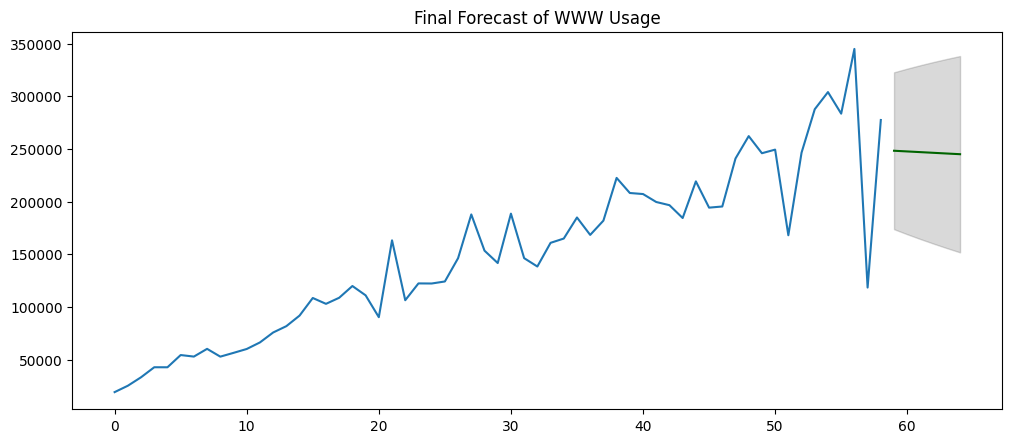

In [ ]:
# Forecast
n_periods = 6
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(adj2), len(adj2)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(adj2)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)
plt.show()

In [ ]:
fc

59    248279.353881
60    247619.290039
61    246960.981011
62    246304.422133
63    245649.608751
64    244996.536225
dtype: float64

In [ ]:
from statsmodels.tsa.stattools import acf

# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.08658979309961119,
 'me': 238417.3434449359,
 'mae': 238417.3434449359,
 'mpe': 0.08658979309961119,
 'rmse': 247785.90104650668,
 'acf1': nan,
 'corr': 0.8765992434255073,
 'minmax': 0.07906772223790703}